In [1]:
# Load the required modules and packages
import numpy as np
import pandas as pd
import pandas_datareader as web
import plotly.express as px
import pandas_datareader
import datetime
import pandas_datareader.data as web
import plotly.graph_objects as go

In [14]:
#Set Dates 
start = datetime.datetime(2021, 3, 1)
end = datetime.datetime(2021, 6, 30)
AAPL = web.DataReader('AAPL','yahoo',start, end)
TSLA = web.DataReader('TSLA','yahoo', start,end)
CCIV = web.DataReader('CCIV','yahoo', start, end)
AMC = web.DataReader('AMC','yahoo', start, end)
GME = web.DataReader('GME','yahoo', start, end)

##Banchmark SPY for comparision
SPY = web.DataReader('SPY','yahoo',start,end)

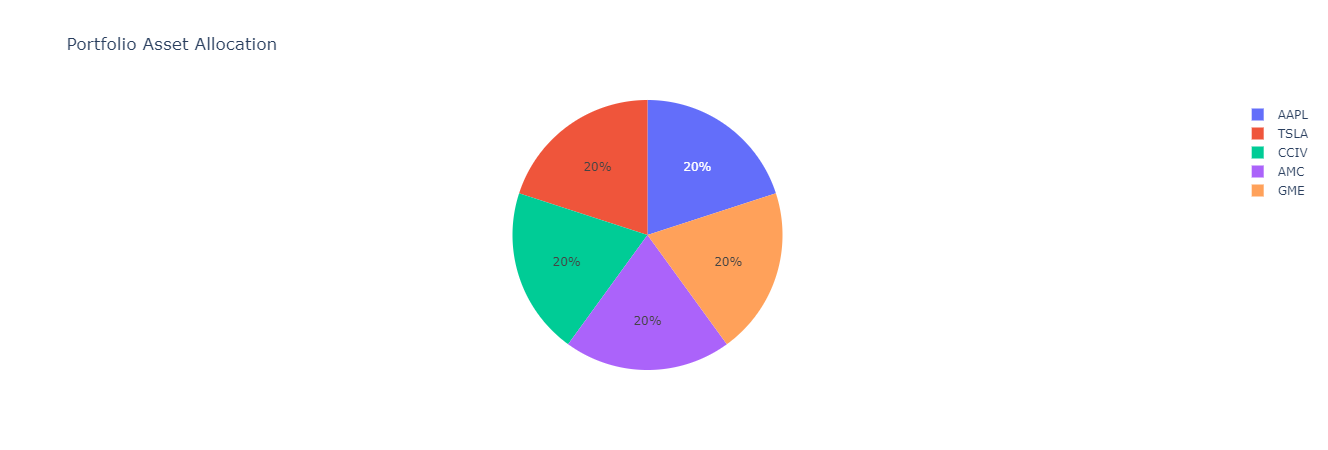

In [15]:
#Portfolio Allocation 
labels = ['AAPL','TSLA','CCIV','AMC', 'GME']
allocation_pct = [.2,.2,.2,.2,.2]

fig0 = go.Figure(data=[go.Pie(labels=labels, values=allocation_pct)])
fig0.update_layout(title="Portfolio Asset Allocation")
fig0.show()

In [16]:
# Calculate the cumulative return
for df in (AAPL, TSLA, CCIV, AMC, GME,SPY): 
  df['Cum Return'] = df['Adj Close']/df.iloc[0]['Adj Close']

In [17]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,Cum Return
Date,,,,,,,
2021-03-01,127.930000,122.790001,123.750000,127.790001,116307900.0,127.573311,1.000000
2021-03-02,128.720001,125.010002,128.410004,125.120003,102260900.0,124.907837,0.979106
2021-03-03,125.709999,121.839996,124.809998,122.059998,112966300.0,121.853020,0.955161
2021-03-04,123.599998,118.620003,121.750000,120.129997,178155000.0,119.926292,0.940058
2021-03-05,121.940002,117.570000,120.980003,121.419998,153766600.0,121.214104,0.950153


In [18]:
# Calculate value of initial investment of 100K in the Portfolio
init_investment = 500000
for df, alloc in zip((AAPL, TSLA, CCIV, AMC, GME),[.2,.2,.2,.2,.2]):
  df['Value'] = alloc*init_investment*df['Cum Return']

In [19]:
# Calculate value of initial investment of 100K in the SPY
SPY['SPY Total'] = init_investment*SPY['Cum Return']
SPY['SPY Total'] = round(SPY['SPY Total'])

In [20]:
# Combine All dataframes
all_vals = [AAPL['Value'], TSLA['Value'], CCIV['Value'], AMC['Value'], GME['Value']]
portfolio_val = pd.concat(all_vals, axis=1)
portfolio_val.columns = ['AAPL','TSLA','CCIV','AMC','GME']

In [21]:
# Calculate Cumulative Return and Cumulative Return %
portfolio_val['Portfolio Total'] = round(portfolio_val.sum(axis=1))
portfolio_val['Cum Return'] = portfolio_val['Portfolio Total']/portfolio_val.iloc[0]['Portfolio Total']
portfolio_val.tail()

,AAPL,TSLA,CCIV,AMC,GME,Portfolio Total,Cum Return
Date,,,,,,,
2021-06-09,99652.502866,83345.633590,86483.840995,537472.750679,251295.675851,1058250.0,2.116500
2021-06-10,98852.965223,84924.070729,82859.940764,466339.868738,183048.169931,916025.0,1.832050
2021-06-11,99824.953686,84892.059194,82076.395947,538126.360388,193803.981213,998724.0,1.997448
2021-06-14,102278.442768,85977.758270,78746.332028,620915.012038,190564.783666,1078482.0,2.156964
2021-06-15,101620.000707,83426.359069,73816.523767,643137.243495,184800.662110,1086801.0,2.173602


In [22]:
portfolio_val['Cum Return %'] = (portfolio_val['Cum Return'] - 1) * 100
SPY['Cum Return %'] = (SPY['Cum Return'] - 1) * 100
SPY.tail()

,High,Low,Open,Close,Volume,Adj Close,Cum Return,SPY Total,Cum Return %
Date,,,,,,,,,
2021-06-09,423.260010,421.410004,423.179993,421.649994,48436300.0,421.649994,1.085864,542932.0,8.586426
2021-06-10,424.630005,421.549988,422.959991,423.609985,51020100.0,423.609985,1.090912,545456.0,9.091178
2021-06-11,424.429993,422.820007,424.200012,424.309998,45533100.0,424.309998,1.092715,546357.0,9.271450
2021-06-14,425.369995,423.100006,424.429993,425.260010,42309100.0,425.260010,1.095161,547581.0,9.516104
2021-06-15,425.459991,423.540009,425.420013,424.480011,51403156.0,424.480011,1.093152,546576.0,9.315233


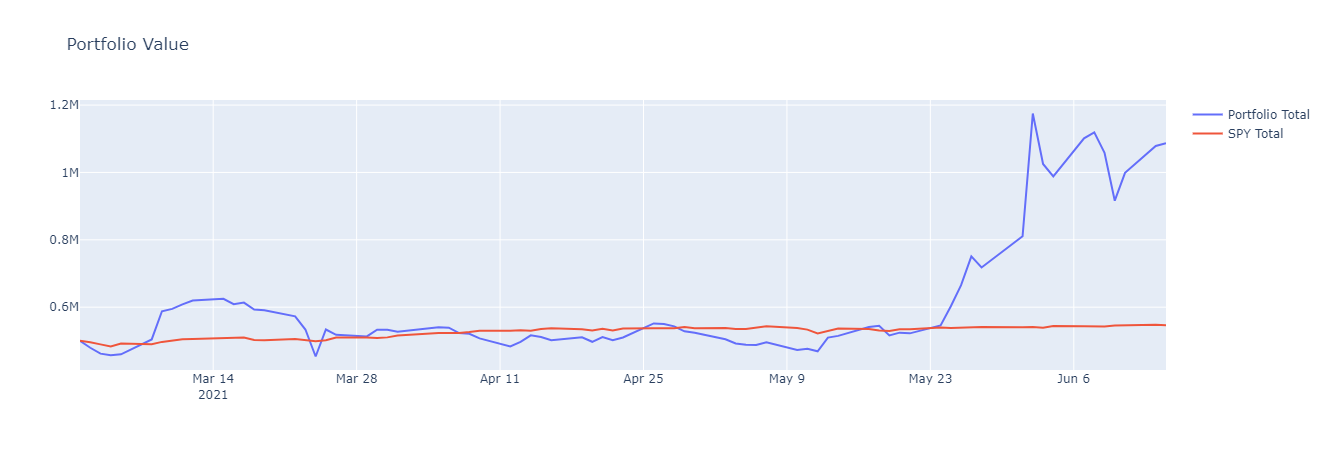

In [23]:
# Visualize Portfolio Value and Compare it to SPY benchmark
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=portfolio_val.index, y=portfolio_val['Portfolio Total'], name='Portfolio Total'))
fig.add_trace(go.Scatter(x=SPY.index, y=SPY['SPY Total'],name='SPY Total'))
fig.update_layout(title="Portfolio Value")

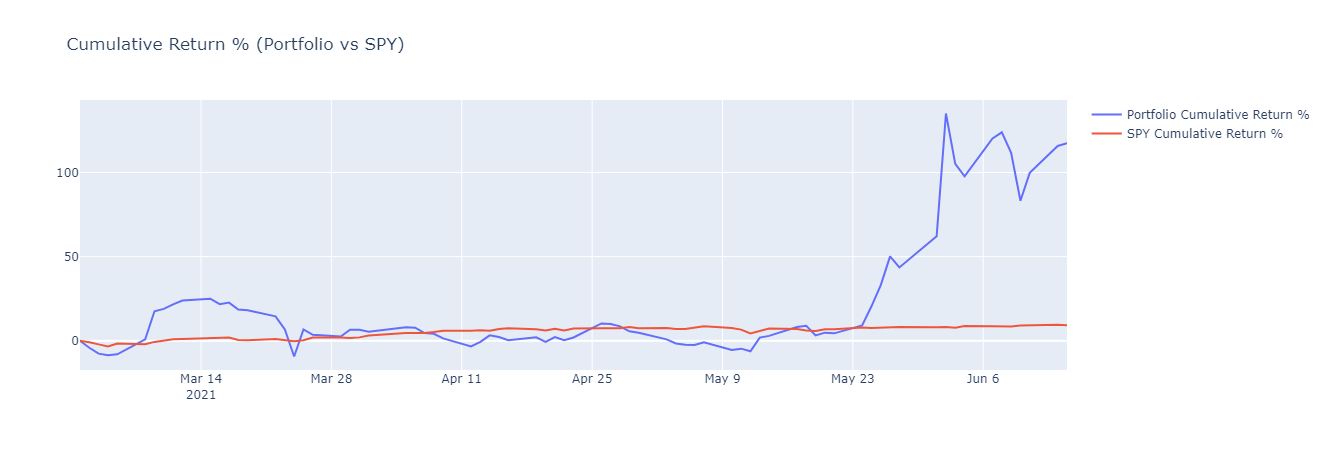

In [24]:
# Visualize Return %
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=portfolio_val.index, y= portfolio_val['Cum Return %'], name='Portfolio Cumulative Return %'))
fig1.add_trace(go.Scatter(x=SPY.index, y=SPY['Cum Return %'],name='SPY Cumulative Return %'))
fig1.update_layout(title="Cumulative Return % (Portfolio vs SPY)")

In [25]:
print("Portfolio Correlation with SPY")
round(portfolio_val['Portfolio Total'].corr(SPY['SPY Total']),2)

Portfolio Correlation with SPY


0.43

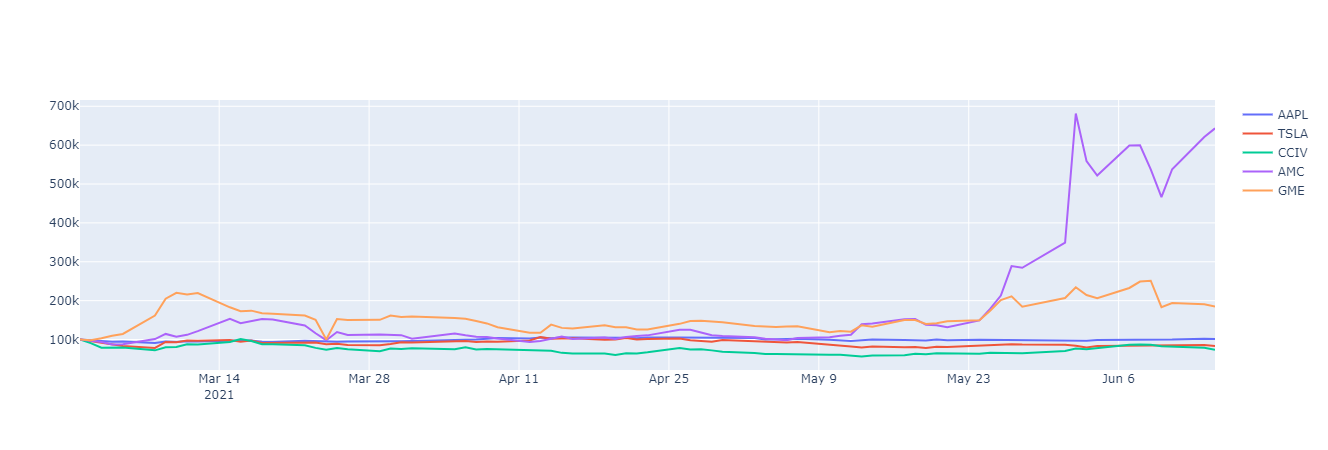

In [27]:
# Visualize Value of Individual Stocks
#'AAPL','TSLA','CCIV','AMC','GME'
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=portfolio_val.index, y= portfolio_val['AAPL'], name='AAPL'))
fig2.add_trace(go.Scatter(x=portfolio_val.index, y= portfolio_val['TSLA'],name='TSLA'))
fig2.add_trace(go.Scatter(x=portfolio_val.index, y= portfolio_val['CCIV'],name='CCIV'))
fig2.add_trace(go.Scatter(x=portfolio_val.index, y= portfolio_val['AMC'],name='AMC'))
fig2.add_trace(go.Scatter(x=portfolio_val.index, y= portfolio_val['GME'],name='GME'))
